In [566]:
#Import core libs
import re
import random
import math

from operator import add

#Import non-core libs
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.special
import scipy.stats as stats

#Import Visualization libs
from bokeh.plotting import figure, output_notebook, show
from bokeh.palettes import Category20
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot

path_to_file = '~/Downloads/properati.csv'
data = pd.read_csv(path_to_file)

In [434]:
# Cantidad de deparmentos agrupados por piso, siempre y cuando el piso sea menor a 50
graph_describe(data.floor[data.floor < 50].value_counts())

Loading BokehJS ...

In [435]:
# Limitamos el estudio que hasta máximos 12 pisos parecen tener cantidad datos significativos

graph_describe(data.floor[(data.floor > 9) & (data.floor < 21)].value_counts(), style="bar")

Loading BokehJS ...

In [582]:
mask_floor_lower_than_15 = data.floor < 15
mask_is_aparment = data.property_type == "apartment"
mask_has_price = data.price_usd_per_m2.notnull()
mask_has_place_name = data.place_name.notnull()



fields = ['floor', 'price_usd_per_m2', 'place_name']
study_set = data.loc[
    mask_floor_lower_than_15 \
    & mask_is_aparment\
    & mask_has_price\
    & mask_has_place_name, 
    fields
]

graph_describe(study_set.floor.value_counts(), style="bar")

Loading BokehJS ...

In [437]:
mask_floor_greater_than_9 = styudy_set.floor > 6

graph_describe(study_set[mask_floor_greater_than_9].floor.value_counts(), style="bar")



Loading BokehJS ...

# Demarcando el Dataset

Vemos com haciendo zoom en valores alrededor del piso 10, vemos que tenemos cantidad datos significativos (más de 30) sólo para los departamentos en el piso menor o igual a 12.

In [465]:
framed_data = study_set[study_set.floor <= 12]

framed_data["floor_price_factor"] = framed_data.price_usd_per_m2 / framed_data.floor

count_per_place = framed_data.groupby(by=["place_name"]).count().floor.sort_values(ascending=False)

print(count_per_place)

place_with_significant_data = list(count_per_place[count_per_place > 50].keys())

print(place_with_significant_data)

mask_is_in_chosen_places = data.place_name.apply(lambda place_name: place_name in place_with_significant_data)

significant_framed_data = study_set[mask_is_in_chosen_places]

graph_describe(significant_framed_data.floor[significant_framed_data.floor <= 6].value_counts(), style="bar") 

place_name
Olivos         197
Caballito      157
Tigre          149
San Isidro     136
Palermo        109
              ... 
Costa Azul       1
Confluencia      1
Versalles        1
Ciudadela        1
Wilde            1
Name: floor, Length: 152, dtype: int64
['Olivos', 'Caballito', 'Tigre', 'San Isidro', 'Palermo', 'Rosario', 'San Fernando', 'Martínez', 'Victoria', 'Flores', 'Caseros', 'Villa Crespo', 'Almagro', 'Balvanera', 'Belgrano', 'Nordelta', 'Rincón de Milberg', 'Recoleta', 'Barrio Norte', 'Ramos Mejía']


/Users/rafa/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rafa/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


Loading BokehJS ...

In [466]:
clean_data = significant_framed_data[significant_framed_data.floor <= 6]

# Tomamos sólo los primero 10 barrios para analizar la distribución de los datos
top_places_len = 10

floors = list(clean_data.floor.unique())
floors.sort()
places = place_with_significant_data
colors = Category20[top_places_len]

mask = (clean_data.place_name == places[0])
for place in places[1:]:
    (clean_data.place_name == places[0])
    
    

In [467]:
per_place_floor_count = clean_data.groupby(["floor", "place_name"]).size().unstack(level=-1).reset_index()

In [468]:
per_place_floor_count

place_name,floor,Almagro,Balvanera,Barrio Norte,Belgrano,Caballito,Caseros,Flores,Martínez,Nordelta,...,Palermo,Ramos Mejía,Recoleta,Rincón de Milberg,Rosario,San Fernando,San Isidro,Tigre,Victoria,Villa Crespo
0,1.0,17.0,10.0,5.0,12.0,25.0,16.0,12.0,25.0,16.0,...,34.0,18.0,9.0,11.0,23.0,26.0,48.0,49.0,35.0,15.0
1,2.0,5.0,11.0,13.0,14.0,20.0,9.0,16.0,19.0,8.0,...,19.0,16.0,10.0,9.0,16.0,27.0,39.0,23.0,19.0,16.0
2,3.0,18.0,5.0,6.0,11.0,24.0,6.0,8.0,20.0,13.0,...,12.0,6.0,7.0,16.0,11.0,18.0,31.0,27.0,16.0,6.0
3,4.0,3.0,6.0,4.0,7.0,18.0,8.0,12.0,7.0,7.0,...,6.0,3.0,15.0,17.0,5.0,13.0,3.0,18.0,10.0,6.0
4,5.0,5.0,6.0,2.0,7.0,14.0,9.0,9.0,5.0,6.0,...,8.0,2.0,9.0,NaN,7.0,6.0,1.0,10.0,3.0,7.0
5,6.0,1.0,8.0,6.0,5.0,10.0,8.0,8.0,1.0,6.0,...,11.0,NaN,4.0,5.0,6.0,3.0,5.0,20.0,NaN,3.0


In [442]:
_data = {'floors' : list(per_place_floor_count.floor) }

for place in place_with_significant_data[0:top_places_len]:
    _data[place] = list(per_place_floor_count[place])

_data

{'floors': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
 'Olivos': [26.0, 27.0, 25.0, 15.0, 13.0, 21.0],
 'Caballito': [25.0, 20.0, 24.0, 18.0, 14.0, 10.0],
 'Tigre': [49.0, 23.0, 27.0, 18.0, 10.0, 20.0],
 'San Isidro': [48.0, 39.0, 31.0, 3.0, 1.0, 5.0],
 'Palermo': [34.0, 19.0, 12.0, 6.0, 8.0, 11.0],
 'Rosario': [23.0, 16.0, 11.0, 5.0, 7.0, 6.0],
 'San Fernando': [26.0, 27.0, 18.0, 13.0, 6.0, 3.0],
 'Martínez': [25.0, 19.0, 20.0, 7.0, 5.0, 1.0],
 'Victoria': [35.0, 19.0, 16.0, 10.0, 3.0, nan],
 'Flores': [12.0, 16.0, 8.0, 12.0, 9.0, 8.0]}

In [443]:
p = figure(x_range=(0, max(_data["floors"])+1), width=900, plot_height=400, title="Cantidad de Apartamentos por Barrio y Piso",
           toolbar_location=None, tools="")

p.vbar_stack(place_with_significant_data[0:top_places_len], x='floors', width=0.9, color=colors, source=_data,
             legend_label=place_with_significant_data[0:top_places_len])

p.y_range.start = 0
#p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "vertical"

p.hover.tooltips = [
    ("Cantidad", "@"),
]

show(p)



In [520]:
sectors = {
    "Sector_1": ["Caballito", "Villa Crespo", "Almagro"],
    "Sector_2": ["Belgrano", "Palermo"],
    "Sector_3": ["Olivos", "Martínez", "San Isidro"]
}


sectorized_data = {'floors' : list(per_place_floor_count.floor) }

for sector, places in sectors.items():
    sector_accumulated = [0] * int(per_place_floor_count.floor.max())
    for place in places:
        place_count = per_place_floor_count[place]
        sector_accumulated = list(map(add, sector_accumulated, place_count))
    sectorized_data[sector] = sector_accumulated 

    
sectorized_data  

{'floors': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
 'Sector_1': [57.0, 41.0, 48.0, 27.0, 26.0, 14.0],
 'Sector_2': [46.0, 33.0, 23.0, 13.0, 15.0, 16.0],
 'Sector_3': [99.0, 85.0, 76.0, 25.0, 19.0, 27.0]}

In [521]:
p = figure(x_range=(0, max(sectorized_data["floors"])+1), width=900, plot_height=400, title="Cantidad de Apartamentos por Sector",
           toolbar_location=None, tools="hover")

p.vbar_stack(sectors.keys(), x='floors', width=0.9, color=Category20[3], source=sectorized_data,
             legend_label=list(sectors.keys()))

p.hover.tooltips = [
    ("Name", "@counts")
]

p.y_range.start = 0
#p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "vertical"

p.hover.tooltips = [
    ("Sector_1:", "@Sector_1"),
    ("Sector_2:", "@Sector_2"),
    ("Sector_3:", "@Sector_3"),
]

show(p)
    

In [522]:
# Filtros globales para las muetras
mask_floor_lower_than_7 = data.floor < 7

# Sector 1
mask_in_sector_1 = significant_framed_data.place_name.apply(lambda place: place in sectors["Sector_1"]) 
sector_1_data = significant_framed_data.loc[ mask_floor_lower_than_7 & mask_in_sector_1, ["floor", "price_usd_per_m2"]]
print(sector_1_data.head(5))

print(sector_1_data.floor.unique())

      floor  price_usd_per_m2
746     2.0       2225.352113
5352    1.0       1000.000000
5355    1.0       1000.000000
6107    2.0       2500.000000
7699    2.0       1888.888889
[2. 1. 4. 3. 5. 6.]


In [523]:
graph_describe(sector_1_data.floor.value_counts(), style="bar") 

Loading BokehJS ...

In [545]:
floor_qualifier = ["low", "low", "mid", "mid", "high", "high"]
ratio_for_pdf = 400
sector_1_data["qualifier"] = sector_1_data.floor.apply(lambda floor: floor_qualifier[int(floor) - 1])

# With outliers
sector_1_price_per_qualifier_means = sector_1_data.loc[(sector_1_data.qualifier == "low") | (sector_1_data.qualifier == "high"), ["qualifier", "price_usd_per_m2"]].groupby(by=["qualifier"]).mean()
sector_1_price_per_qualifier_std = sector_1_data.loc[(sector_1_data.qualifier == "low") | (sector_1_data.qualifier == "high"), ["qualifier", "price_usd_per_m2"]].groupby(by=["qualifier"]).std()

print("Means: \n", sector_1_price_per_qualifier_means)
print("Standard Devs: \n", sector_1_price_per_qualifier_std)

Means: 
            price_usd_per_m2
qualifier                  
high            2601.831627
low             2277.681199
Standard Devs: 
            price_usd_per_m2
qualifier                  
high             402.995544
low              484.630406


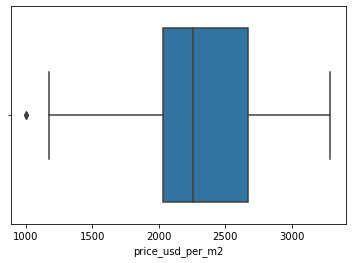

In [546]:
# Para los "bajos" - Sector 1
sector_1_low = sector_1_data.loc[(sector_1_data.qualifier == "low"),:]
sb.boxplot(sector_1_low["price_usd_per_m2"]);

Q1: 2035.4366028708134 - Q2: 2259.982448442299 - Q3: 2668.053278688524 - Q4: 3290.909090909091
Sector 1 Low Mean Price m2: 2339.041598373079
Sector 1 Low Median Price m2: 2282.608695652174
Sector 1 Low Std Price m2: 415.100344064831
Sector 1 Low Count: 93


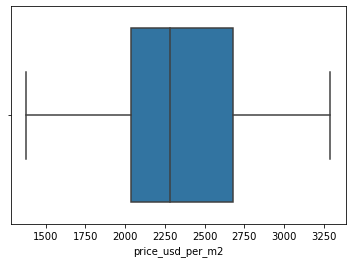

In [547]:
q1 = sector_1_low["price_usd_per_m2"].quantile(0.25)
q2 = sector_1_low["price_usd_per_m2"].quantile(0.5)
q3 = sector_1_low["price_usd_per_m2"].quantile(0.75)
q4 = sector_1_low["price_usd_per_m2"].quantile(1)
                                 
print("Q1: {} - Q2: {} - Q3: {} - Q4: {}".format(q1,q2,q3,q4))

sector_1_low_without_outlier = sector_1_low[
    ( sector_1_low["price_usd_per_m2"] < q3 + (1.5 * (q3 - q1)) ) \
    & ( sector_1_low["price_usd_per_m2"] > q2 - (1.5 * (q3 - q1)) ) 
]

sb.boxplot(sector_1_low_without_outlier["price_usd_per_m2"]);
# Media y Desviación Estándar sin outliers

sector_1_low_mean = sector_1_low_without_outlier["price_usd_per_m2"].mean()
sector_1_low_median = sector_1_low_without_outlier["price_usd_per_m2"].median()
sector_1_low_std  = sector_1_low_without_outlier["price_usd_per_m2"].std()

print("Sector 1 Low Mean Price m2: {}".format(sector_1_low_mean))
print("Sector 1 Low Median Price m2: {}".format(sector_1_low_median))
print("Sector 1 Low Std Price m2: {}".format(sector_1_low_std))
print("Sector 1 Low Count: {}".format(sector_1_low_without_outlier.count()[0]))

#Bajamos la Desviación Estándar de 484 a 415 


# Dibujamos la distribución y la guardamos en p1
hist, edges = np.histogram(sector_1_low_without_outlier["price_usd_per_m2"], density=True, bins=5)

x = np.linspace(1000, 4000, 5000)
pdf = 1/(sector_3_high_std * np.sqrt(2*np.pi)) * np.exp(-(x-sector_3_high_mean)**2 / (2*sector_3_high_std**2))
cdf = ((1+scipy.special.erf((x-sector_3_high_mean)/np.sqrt(2*sector_3_high_std**2)))/2) / ratio_for_pdf

sector_1_low_chart = make_plot("Sector 1 Low Distribution (μ={}, σ={})".format(sector_1_low_mean, sector_1_low_std), hist, edges, x, pdf, cdf)

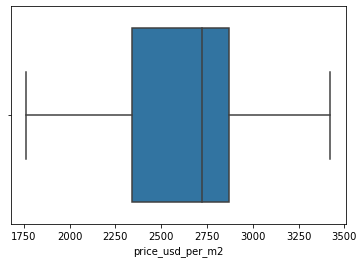

In [548]:
# Para los "Altos" - Sector 1
sector_1_high = sector_1_data.loc[(sector_1_data.qualifier == "high"),:]
sb.boxplot(sector_1_high["price_usd_per_m2"]);

Q1: 2343.137254901961 - Q2: 2724.590163934426 - Q3: 2871.755813953488 - Q4: 3423.0769230769233
Sector 1 High Mean Price m2: 2663.0037981489418
Sector 1 High Median Price m2: 2800.0
Sector 1 High Std Price m2: 352.5545348045817
Sector 1 High Count: 37


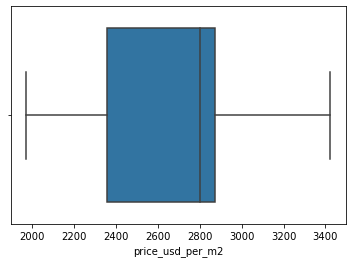

In [549]:
q1 = sector_1_high["price_usd_per_m2"].quantile(0.25)
q2 = sector_1_high["price_usd_per_m2"].quantile(0.5)
q3 = sector_1_high["price_usd_per_m2"].quantile(0.75)
q4 = sector_1_high["price_usd_per_m2"].quantile(1)
                                 
print("Q1: {} - Q2: {} - Q3: {} - Q4: {}".format(q1,q2,q3,q4))

sector_1_high_without_outlier = sector_1_high[
    ( sector_1_high["price_usd_per_m2"] < q3 + (1.5 * (q3 - q1)) ) \
    & ( sector_1_high["price_usd_per_m2"] > q2 - (1.5 * (q3 - q1)) ) 
]
sb.boxplot(sector_1_high_without_outlier["price_usd_per_m2"]);
# Media y Desviación Estándar sin outliers

sector_1_high_mean = sector_1_high_without_outlier["price_usd_per_m2"].mean()
sector_1_high_median = sector_1_high_without_outlier["price_usd_per_m2"].median()
sector_1_high_std  = sector_1_high_without_outlier["price_usd_per_m2"].std()

print("Sector 1 High Mean Price m2: {}".format(sector_1_high_mean))
print("Sector 1 High Median Price m2: {}".format(sector_1_high_median))
print("Sector 1 High Std Price m2: {}".format(sector_1_high_std))
print("Sector 1 High Count: {}".format(sector_1_high_without_outlier.count()[0]))

#Bajamos la Desviación Estándar de 402 a 352 

# Dibujamos la distribución
hist, edges = np.histogram(sector_1_high_without_outlier["price_usd_per_m2"], density=True, bins=5)

x = np.linspace(1000, 4000, 5000)
pdf = 1/(sector_3_high_std * np.sqrt(2*np.pi)) * np.exp(-(x-sector_3_high_mean)**2 / (2*sector_3_high_std**2))
cdf = ((1+scipy.special.erf((x-sector_3_high_mean)/np.sqrt(2*sector_3_high_std**2)))/2) / ratio_for_pdf

sector_1_high_chart = make_plot("Sector 1 High Distribution (μ={}, σ={})".format(sector_1_high_mean, sector_1_high_std), hist, edges, x, pdf, cdf)

In [550]:
# Sector 2
mask_in_sector_2 = significant_framed_data.place_name.apply(lambda place: place in sectors["Sector_2"]) 
sector_2_data = significant_framed_data.loc[ mask_floor_lower_than_7 & mask_in_sector_2, ["floor", "price_usd_per_m2"]]
print(sector_2_data.head(5))

print(sector_2_data.floor.unique())

floor_qualifier = ["low", "low", "mid", "mid", "high", "high"]

sector_2_data["qualifier"] = sector_2_data.floor.apply(lambda floor: floor_qualifier[int(floor) - 1])

# With outliers
sector_2_price_per_qualifier_means = sector_2_data.loc[(sector_2_data.qualifier == "low") | (sector_2_data.qualifier == "high"), ["qualifier", "price_usd_per_m2"]].groupby(by=["qualifier"]).mean()
sector_2_price_per_qualifier_std = sector_2_data.loc[(sector_2_data.qualifier == "low") | (sector_2_data.qualifier == "high"), ["qualifier", "price_usd_per_m2"]].groupby(by=["qualifier"]).std()

print("Means: \n", sector_2_price_per_qualifier_means)
print("\nStandard Devs: \n", sector_2_price_per_qualifier_std)

       floor  price_usd_per_m2
4829     5.0       2553.191489
6400     2.0       2602.941176
7024     1.0       5504.860360
9448     1.0       2613.636364
11173    3.0       3235.294118
[5. 2. 1. 3. 6. 4.]
Means: 
            price_usd_per_m2
qualifier                  
high            3340.559726
low             2859.284171

Standard Devs: 
            price_usd_per_m2
qualifier                  
high            3119.825707
low             1993.716236


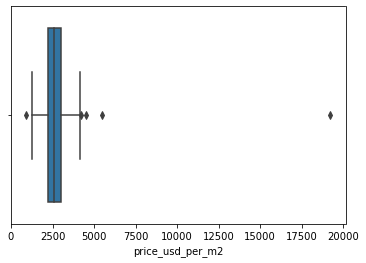

In [551]:
# Para los "bajos" - Sector 2
sector_2_low = sector_2_data.loc[(sector_2_data.qualifier == "low"),:]
sb.boxplot(sector_2_low["price_usd_per_m2"]);

Q1: 2220.843091334895 - Q2: 2560.0 - Q3: 2990.3846153846152 - Q4: 19230.76923076923
Sector 2 Low Mean Price m2: 2606.25794245144
Sector 2 Low Median Price m2: 2553.1914893617013
Sector 2 Low Std Price m2: 519.5830307879482
Sector 2 Low Count: 73


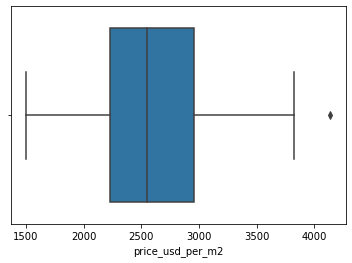

In [552]:
q1 = sector_2_low["price_usd_per_m2"].quantile(0.25)
q2 = sector_2_low["price_usd_per_m2"].quantile(0.5)
q3 = sector_2_low["price_usd_per_m2"].quantile(0.75)
q4 = sector_2_low["price_usd_per_m2"].quantile(1)
                                 
print("Q1: {} - Q2: {} - Q3: {} - Q4: {}".format(q1,q2,q3,q4))

sector_2_low_without_outlier = sector_2_low[
    ( sector_2_low["price_usd_per_m2"] < q3 + (1.5 * (q3 - q1)) ) \
    & ( sector_2_low["price_usd_per_m2"] > q2 - (1.5 * (q3 - q1)) ) 
]

sb.boxplot(sector_2_low_without_outlier["price_usd_per_m2"]);

# Media y Desviación Estándar sin outliers

sector_2_low_mean = sector_2_low_without_outlier["price_usd_per_m2"].mean()
sector_2_low_median = sector_2_low_without_outlier["price_usd_per_m2"].median()
sector_2_low_std  = sector_2_low_without_outlier["price_usd_per_m2"].std()

print("Sector 2 Low Mean Price m2: {}".format(sector_2_low_mean))
print("Sector 2 Low Median Price m2: {}".format(sector_2_low_median))
print("Sector 2 Low Std Price m2: {}".format(sector_2_low_std))
print("Sector 2 Low Count: {}".format(sector_2_low_without_outlier.count()[0]))

#Bajamos la Desviación Estándar de 1993 a 519

# Dibujamos la distribución y la guardamos en p1
hist, edges = np.histogram(sector_2_low_without_outlier["price_usd_per_m2"], density=True, bins=5)

x = np.linspace(1000, 4000, 5000)
pdf = 1/(sector_3_high_std * np.sqrt(2*np.pi)) * np.exp(-(x-sector_3_high_mean)**2 / (2*sector_3_high_std**2))
cdf = ((1+scipy.special.erf((x-sector_3_high_mean)/np.sqrt(2*sector_3_high_std**2)))/2) / ratio_for_pdf


sector_2_low_chart = make_plot("Sector 2 Low Distribution (μ={}, σ={})".format(sector_2_low_mean, sector_2_low_std), hist, edges, x, pdf, cdf)

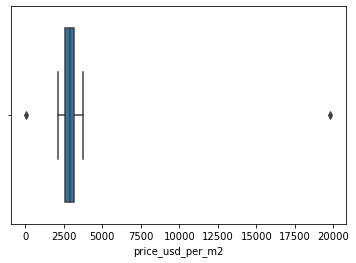

In [553]:
# Para los "altos" - Sector 2
sector_2_high = sector_2_data.loc[(sector_2_data.qualifier == "high"),:]
sb.boxplot(sector_2_high["price_usd_per_m2"]);

Q1: 2556.5957446808507 - Q2: 2864.406779661017 - Q3: 3139.0765765765764 - Q4: 19800.0
Sector 2 Low Mean Price m2: 2887.102821157471
Sector 2 Low Median Price m2: 2864.406779661017
Sector 2 Low Std Price m2: 386.0231593359568
Sector 2 Low Count: 29


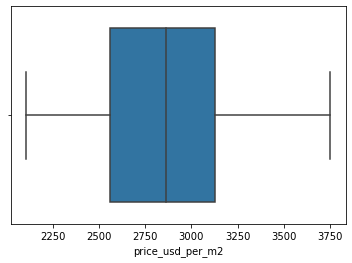

In [554]:
q1 = sector_2_high["price_usd_per_m2"].quantile(0.25)
q2 = sector_2_high["price_usd_per_m2"].quantile(0.5)
q3 = sector_2_high["price_usd_per_m2"].quantile(0.75)
q4 = sector_2_high["price_usd_per_m2"].quantile(1)
                                 
print("Q1: {} - Q2: {} - Q3: {} - Q4: {}".format(q1,q2,q3,q4))

sector_2_high_without_outlier = sector_2_high[
    ( sector_2_high["price_usd_per_m2"] < q3 + (1.5 * (q3 - q1)) ) \
    & ( sector_2_high["price_usd_per_m2"] > q2 - (1.5 * (q3 - q1)) ) 
]
sb.boxplot(sector_2_high_without_outlier["price_usd_per_m2"]);
# Media y Desviación Estándar sin outliers

sector_2_high_mean = sector_2_high_without_outlier["price_usd_per_m2"].mean()
sector_2_high_median = sector_2_high_without_outlier["price_usd_per_m2"].median()
sector_2_high_std  = sector_2_high_without_outlier["price_usd_per_m2"].std()

print("Sector 2 Low Mean Price m2: {}".format(sector_2_high_mean))
print("Sector 2 Low Median Price m2: {}".format(sector_2_high_median))
print("Sector 2 Low Std Price m2: {}".format(sector_2_high_std))
print("Sector 2 Low Count: {}".format(sector_2_high_without_outlier.count()[0]))

#Bajamos la Desviación Estándar de 3119 a 386

# Dibujamos la distribución y la guardamos en p1
hist, edges = np.histogram(sector_2_high_without_outlier["price_usd_per_m2"], density=True, bins=5)

x = np.linspace(1000, 4000, 5000)
pdf = 1/(sector_3_high_std * np.sqrt(2*np.pi)) * np.exp(-(x-sector_3_high_mean)**2 / (2*sector_3_high_std**2))
cdf = ((1+scipy.special.erf((x-sector_3_high_mean)/np.sqrt(2*sector_3_high_std**2)))/2) / ratio_for_pdf

sector_2_high_chart = make_plot("Sector 2 High Distribution (μ={}, σ={})".format(sector_2_high_mean, sector_2_high_std), hist, edges, x, pdf, cdf)

In [555]:
# Sector 3
mask_in_sector_3 = significant_framed_data.place_name.apply(lambda place: place in sectors["Sector_3"])
sector_3_data = significant_framed_data.loc[ mask_floor_lower_than_7 & mask_in_sector_3, ["floor", "price_usd_per_m2"]]
print(sector_3_data.head(5))
print(sector_3_data.floor.unique())

floor_qualifier = ["low", "low", "mid", "mid", "high", "high"]

sector_3_data["qualifier"] = sector_3_data.floor.apply(lambda floor: floor_qualifier[int(floor) - 1])

# With outliers
sector_3_price_per_qualifier_means = sector_3_data.loc[(sector_3_data.qualifier == "low") | (sector_3_data.qualifier == "high"), ["qualifier", "price_usd_per_m2"]].groupby(by=["qualifier"]).mean()
sector_3_price_per_qualifier_std = sector_3_data.loc[(sector_3_data.qualifier == "low") | (sector_3_data.qualifier == "high"), ["qualifier", "price_usd_per_m2"]].groupby(by=["qualifier"]).std()

print("Means: \n", sector_3_price_per_qualifier_means)
print("\nStandard Devs: \n", sector_3_price_per_qualifier_std)

     floor  price_usd_per_m2
114    2.0       2333.333333
323    2.0       3139.534884
500    1.0       2830.508475
502    5.0       2781.250000
519    3.0       2838.235294
[2. 1. 5. 3. 4. 6.]
Means: 
            price_usd_per_m2
qualifier                  
high            3010.082419
low             2660.283330

Standard Devs: 
            price_usd_per_m2
qualifier                  
high             496.737878
low              626.618491


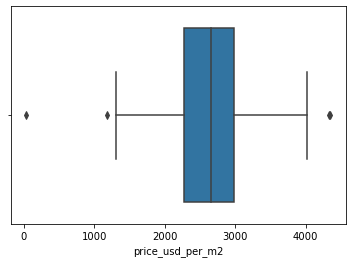

In [556]:
# Para los "bajos" - Sector 3
sector_3_low = sector_3_data.loc[(sector_3_data.qualifier == "low"),:]
sb.boxplot(sector_3_low["price_usd_per_m2"]);

Q1: 2272.7272727272725 - Q2: 2662.3376623376626 - Q3: 2977.272727272727 - Q4: 4350.639053254438
Sector 3 Low Mean Price m2: 2679.5216975442286
Sector 3 Low Median Price m2: 2664.5021645021643
Sector 3 Low Std Price m2: 549.3929810739103
Sector 3 Low Count: 178


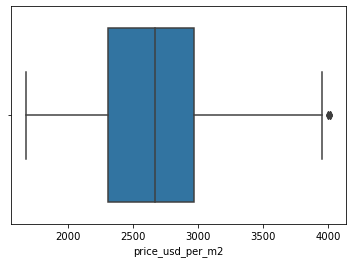

In [557]:
q1 = sector_3_low["price_usd_per_m2"].quantile(0.25)
q2 = sector_3_low["price_usd_per_m2"].quantile(0.5)
q3 = sector_3_low["price_usd_per_m2"].quantile(0.75)
q4 = sector_3_low["price_usd_per_m2"].quantile(1)
                                 
print("Q1: {} - Q2: {} - Q3: {} - Q4: {}".format(q1,q2,q3,q4))

sector_3_low_without_outlier = sector_3_low[
    ( sector_3_low["price_usd_per_m2"] < q3 + (1.5 * (q3 - q1)) ) \
    & ( sector_3_low["price_usd_per_m2"] > q2 - (1.5 * (q3 - q1)) ) 
]
sb.boxplot(sector_3_low_without_outlier["price_usd_per_m2"]);
# Media y Desviación Estándar sin outliers

sector_3_low_mean = sector_3_low_without_outlier["price_usd_per_m2"].mean()
sector_3_low_median = sector_3_low_without_outlier["price_usd_per_m2"].median()
sector_3_low_std  = sector_3_low_without_outlier["price_usd_per_m2"].std()

print("Sector 3 Low Mean Price m2: {}".format(sector_3_low_mean))
print("Sector 3 Low Median Price m2: {}".format(sector_3_low_median))
print("Sector 3 Low Std Price m2: {}".format(sector_3_low_std))
print("Sector 3 Low Count: {}".format(sector_3_low_without_outlier.count()[0]))

#Bajamos la Desviación Estándar de 626 a 549

# Dibujamos la distribución y la guardamos en p1
hist, edges = np.histogram(sector_3_low_without_outlier["price_usd_per_m2"], density=True, bins=5)

x = np.linspace(1000, 4000, 5000)
pdf = 1/(sector_3_high_std * np.sqrt(2*np.pi)) * np.exp(-(x-sector_3_high_mean)**2 / (2*sector_3_high_std**2))
cdf = ((1+scipy.special.erf((x-sector_3_high_mean)/np.sqrt(2*sector_3_high_std**2)))/2) / ratio_for_pdf

sector_3_low_chart = make_plot("Sector 3 Low Distribution (μ={}, σ={})".format(sector_3_low_mean, sector_3_low_std), hist, edges, x, pdf, cdf)

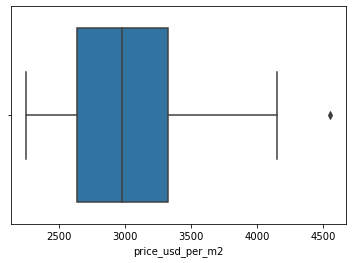

In [558]:
# Para los "altos" - Sector 3
sector_3_high = sector_3_data.loc[(sector_3_data.qualifier == "high"),:]
sb.boxplot(sector_3_high["price_usd_per_m2"]);

Q1: 2639.4906232592684 - Q2: 2977.45 - Q3: 3326.923076923077 - Q4: 4552.845528455285
Sector 3 High Mean Price m2: 2975.798794803128
Sector 3 High Median Price m2: 2975.333333333333
Sector 3 High Std Price m2: 443.9152731644107
Sector 3 High Count: 45


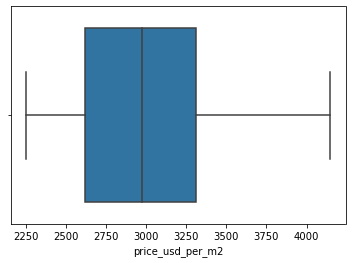

In [559]:
q1 = sector_3_high["price_usd_per_m2"].quantile(0.25)
q2 = sector_3_high["price_usd_per_m2"].quantile(0.5)
q3 = sector_3_high["price_usd_per_m2"].quantile(0.75)
q4 = sector_3_high["price_usd_per_m2"].quantile(1)
                                 
print("Q1: {} - Q2: {} - Q3: {} - Q4: {}".format(q1,q2,q3,q4))

sector_3_high_without_outlier = sector_3_high[
    ( sector_3_high["price_usd_per_m2"] < q3 + (1.5 * (q3 - q1)) ) \
    & ( sector_3_high["price_usd_per_m2"] > q2 - (1.5 * (q3 - q1)) ) 
]

sb.boxplot(sector_3_high_without_outlier["price_usd_per_m2"]);
# Media y Desviación Estándar sin outliers

sector_3_high_mean = sector_3_high_without_outlier["price_usd_per_m2"].mean()
sector_3_high_median = sector_3_high_without_outlier["price_usd_per_m2"].median()
sector_3_high_std  = sector_3_high_without_outlier["price_usd_per_m2"].std()

print("Sector 3 High Mean Price m2: {}".format(sector_3_high_mean))
print("Sector 3 High Median Price m2: {}".format(sector_3_high_median))
print("Sector 3 High Std Price m2: {}".format(sector_3_high_std))
print("Sector 3 High Count: {}".format(sector_3_high_without_outlier.count()[0]))

#Bajamos la Desviación Estándar de 496 a 443

# Dibujamos la distribución y la guardamos en p1
hist, edges = np.histogram(sector_3_high_without_outlier["price_usd_per_m2"], density=True, bins=5)

x = np.linspace(1000, 4000, 5000)
pdf = 1/(sector_3_high_std * np.sqrt(2*np.pi)) * np.exp(-(x-sector_3_high_mean)**2 / (2*sector_3_high_std**2))
cdf = ((1+scipy.special.erf((x-sector_3_high_mean)/np.sqrt(2*sector_3_high_std**2)))/2) / ratio_for_pdf

sector_3_high_chart = make_plot("Sector 3 High Distribution (μ={}, σ={})".format(sector_3_high_mean, sector_3_high_std), hist, edges, x, pdf, cdf)

In [560]:
show(gridplot([sector_1_low_chart, sector_1_high_chart, sector_2_low_chart, sector_2_high_chart, sector_3_low_chart, sector_3_high_chart], ncols=2, plot_width=600, plot_height=300, toolbar_location=None))

In [455]:
# Test de Hipótesis - Por Hacer

# Planteo de Problemática - Sector 1

Llamemos $x$ a la variable aleatoria e independiente que representa el piso del apartamento y ${y}$ la variable dependiente que describe el precio que resulta de aplicar la función $f_p(x)=y$.


La pregunta que queremos responder es si podemos decir que con un nivel de significancia del 95% que si los departamentos de los pisos más altos(pisos 5 y 6) de la muestra del sector 1 normalmente son más costosos que los pisos más bajos (0,1) del mismo sector, por tanto planteamos la Hipotesis de las siguiente manera
 
H0: $\mu_{L1} = \mu_{H1}0$    
H1: $\mu_{L1} < \mu_{H1}0$


Donde $\mu_{L1}$ es el promedio de precios para los departamentos bajos y vale 2339, y $\mu_{H1}0$ representaría la media a comparar que representa a la media precio de los departamentos altos y vale 2663.

De la misma manera tenemos que  $\sigma_{L1}$ representa la desviación estándar para los departamentos bajos y vale 415.1 y $\sigma_{H1}$ representa la desviación estándar de los departamentos altos.

Sea $X_1, X_2, ..., X_n$ un conjunto de variables aleatorias, independientes e identicamente distribuídas de una distribución con media $\mu$ y varianza $\sigma^2 \neq 0$. Entonces si $n$ es suficientemente grande, la variable aleatoria $\hat{X} = \frac{1}{n} \sum _{i=1}^{n}{X_i}$ tiene aproximadamente una distribución normal con $\mu_{\hat{X}} = \mu$ y ${\sigma_{\hat{X}}^2} = {\frac{\sigma^2}{n}}$



Entonces los estimadores de la población basada en la muestra de **Sector 1 para pisos Bajos** serían:


$\mu_{\hat{X}_{L1}} = 2339$  

y ${\sigma_{\hat{X}_{L1}}^2} = {\frac{415^2}{93}} = 1851,88$

por tanto:

${\sigma_{\hat{X}_{L1}}} = {\frac{415}{\sqrt{93}}} = 43,03$


Entonces la variable aleatoria $Z = \frac{media\text{ }muestral - media\text{ }H0}{\sigma / \sqrt{n}}$ tiene distribución $N(0,1)$ y podemos calcular valores críticos usando `stats.norm.cdf` que dado un valor de Z nos devuelve la probabilidad acumulada para ese Z

In [583]:
media_muestral = 2339
media_H0 = 2663
sd = 415
n = 93

#construimos el estadístico de test Z:
Z = (media_muestral - media_H0 ) / (sd/math.sqrt(n))
print('estadístico de test:', Z)

alpha = 0.05
print('nivel de significación:', alpha)

alpha = 0.01
z_critico = stats.norm.ppf(alpha)
z_critico

estadístico de test: -7.529018907377632
nivel de significación: 0.05


-2.3263478740408408

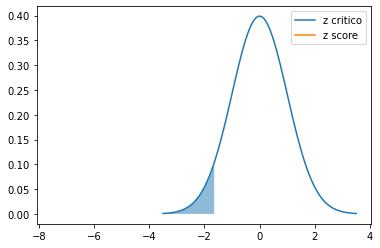

In [581]:
critical_value = z_critico

# Plot the normal distribution
samples = 100
x_plot = np.linspace(-3.5, 3.5, samples)
y_plot = stats.norm.pdf(x_plot, 0, 1)
plt.plot(x_plot, y_plot)

# Plot the critical region
x_crit = np.linspace(critical_value, -3.5, samples)
y_crit = stats.norm.pdf(x_crit, 0, 1)
# colorea la region de rechazo de H0:
plt.fill_between(x_crit,  y_crit, alpha=.5)

# Plot the z score, linea naranja:
plt.plot([Z, Z], [0, stats.norm.pdf(Z)])

# Show legend
plt.legend(['z critico', 'z score'])
plt.show()

### Intervalo de confianza

Si queremos estimar un parámetro poblacional (media, proporción, desvío estandar) a partir de un estadístico muestral, no podemos estar seguros del resultado pero podemos dar algún nivel de confianza a nuestra predicción por medio de un intervalo de confianza (CI).

|   |media|proporción|desvío estandar|   |
|---|:---:|:---:|:---:|---|
|población|$\mu$|$p$|$\sigma$|parámetros|
|muestra|$\bar{x}$|$\hat{p}$|$s$|estadísticos|

Calculemos un intervalo de confianza del 95% para la media muestral del dataset Klout Scores.

Para muestras grandes, podemos resolver esta ecuación con un nivel de alfa de $\alpha=.05$

$$\bar{x}+z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}\lt\mu_{estimator}\lt\bar{x}-z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}$$ 

Calculemos estos valores para nuestros datos:


La **distribución de probabilidad de una variable aleatoria X**, también llamada **función de distribución** de X es la función $F_X(x)$, que asigna a cada evento definido sobre la variable aleatoria $X$ una probabilidad dada por la siguiente expresión:

\begin{equation}
  F_X(x) = P(X \le x)
\end{equation}


In [383]:
### Utilidades

def graph_describe(serie_to_draw, style="line"):
    data_floors_dict = serie_to_draw.to_dict()
    data_floors_dict.keys()
    
    
    _x = list(data_floors_dict.keys())
    _y = list(data_floors_dict.values())

    p = figure(plot_width=400, plot_height=400)

    # add a line renderer
    if style == "line":
        p.line(_x, _y, line_width=2)
    elif style == "bar":
        p.vbar(x=_x, top=_y, width=0.9)

    output_notebook()
    show(p)

# source: https://docs.bokeh.org/en/latest/docs/gallery/histogram.html
def make_plot(title, hist, edges, x, pdf, cdf):
    p = figure(title=title, tools='', background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
    p.line(x, pdf, line_color="#ff8888", line_width=4, alpha=0.7, legend_label="PDF")
    p.line(x, cdf, line_color="orange", line_width=2, alpha=0.7, legend_label="CDF")

    p.y_range.start = 0
    p.legend.location = "center_right"
    p.legend.background_fill_color = "#fefefe"
    p.xaxis.axis_label = 'x'
    p.yaxis.axis_label = 'Pr(x)'
    p.grid.grid_line_color="white"
    return p
    

6.0

In [271]:
significant_framed_data.place_name.unique()

array(['San Isidro', 'Victoria', 'San Fernando', 'Rosario', 'Martínez',
       'Barrio Norte', 'Flores', 'Caballito', 'Ramos Mejía', 'Olivos',
       'Tigre', 'Rincón de Milberg', 'Nordelta', 'Balvanera', 'Caseros',
       'Palermo', 'Almagro', 'Villa Crespo', 'Belgrano', 'Recoleta'],
      dtype=object)

\begin{equation}
  F_X(x) = P(X \le x)
\end{equation}